In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import umap
from scipy import stats
pd.set_option('display.max_rows', 50)
np.set_printoptions(threshold=50)
import joblib
from scipy.stats import fisher_exact
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
import statsmodels.api as sm
import pickle
from joblib import load

# Load analysis datasets

In [2]:
alldiag_pivot = pd.read_pickle('pivot_table_rdm42.pkl')

# Dimentional Reduction

In [3]:
y = alldiag_pivot["isAD"].replace({1:"Alzheimer", 0:"Control"})

In [4]:
demographic_cols = ['Age', 'Sex', 'Race', 'Death_Status','#diagnosis']

In [5]:
z = alldiag_pivot[demographic_cols]
X = alldiag_pivot.drop('isAD', axis=1).drop(demographic_cols, axis=1).astype('int32')

In [6]:
X

,"""walking corpse"" syndrome",'light-for-dates' infant with signs of fetal malnutrition,(HFpEF) heart failure with preserved ejection fraction (HCC),(Idiopathic) normal pressure hydrocephalus (HCC),1st MTP arthritis,1st degree AV block,"2-part displaced fracture of surgical neck of right humerus, initial encounter for closed fracture","2-part displaced fracture of surgical neck of right humerus, subsequent encounter for fracture with routine healing","2-part nondisplaced fracture of surgical neck of left humerus, initial encounter for closed fracture","2-part nondisplaced fracture of surgical neck of left humerus, subsequent encounter for fracture with routine healing",...,Zoster ocular disease,"Zoster ocular disease, unspecified",Zoster ophthalmicus,Zoster with other complications,Zoster without complications,"Zygoma fracture, closed, initial encounter","Zygomatic arch fracture, closed, initial encounter","Zygomatic fracture, closed, initial encounter","Zygomatic fracture, right side, subsequent encounter for fracture with routine healing","Zygomatic fracture, unspecified side, initial encounter for closed fracture (HCC)"
PatientID,,,,,,,,,,,,,,,,,,,,,
D0003B2687D8F9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D000D5B83D9620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D000D6884BD199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D0016F824B7B74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D00195531E21B1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DFFCD874260A78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DFFE6A5DC77E11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DFFF132A593DAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA(n=1000)

In [7]:
pca = joblib.load('pca1000_model_rdm42.joblib')
data_pca = np.load('data_pca1000_rdm42.npy')

## Kmeans Clustering (n=2) & UMAP

In [9]:
# K-means Clustering(n =2)
kmeans2 = KMeans(n_clusters=2, random_state=42) 
kmeans2.fit(data_pca)
data_pca_kmeans2 = kmeans2.fit_transform(data_pca)

In [10]:
kmeans2_labels = kmeans2.labels_

In [11]:
'''
%%time
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True, verbose = 1)
X_embedded = mapper.fit_transform(data_pca)
'''

/wynton/protected/home/sirota/ykatsuhara/.local/lib/python3.7/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', random_state=42, verbose=1)
Fri Oct 11 16:34:04 2024 Construct fuzzy simplicial set
Fri Oct 11 16:34:04 2024 Finding Nearest Neighbors
Fri Oct 11 16:34:04 2024 Building RP forest with 10 trees
Fri Oct 11 16:34:04 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Fri Oct 11 16:34:18 2024 Finished Nearest Neighbor Search
Fri Oct 11 16:34:21 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Oct 11 16:34:48 2024 Finished embedding
CPU times: user 1min 12s, sys: 12 s, total: 1min 24s
Wall time: 44.9 s


In [12]:
'''
# UMAP 結果の保存
with open('umap_results_diagnosis.pkl', 'wb') as f:
    pickle.dump(X_embedded, f)
'''

In [13]:
'''
# UMAP モデルの保存
joblib.dump(mapper, 'umap_model_diagnosis.joblib')
'''

Fri Oct 11 16:34:52 2024 Worst tree score: 0.41958627
Fri Oct 11 16:34:52 2024 Mean tree score: 0.43603970
Fri Oct 11 16:34:52 2024 Best tree score: 0.45258878
Fri Oct 11 16:34:55 2024 Forward diversification reduced edges from 125445 to 50204
Fri Oct 11 16:34:58 2024 Reverse diversification reduced edges from 50204 to 50204


/wynton/protected/home/sirota/ykatsuhara/.local/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Fri Oct 11 16:35:01 2024 Degree pruning reduced edges from 61722 to 61491
Fri Oct 11 16:35:01 2024 Resorting data and graph based on tree order
Fri Oct 11 16:35:01 2024 Building and compiling search function


['umap_model_diagnosis.joblib']

In [11]:
# Load umap results
with open('umap_results_diagnosis.pkl', 'rb') as file:
    X_embedded = pickle.load(file)


In [12]:
loaded_umap_model = load('umap_model_diagnosis.joblib')

Mon Oct 21 12:11:19 2024 Building and compiling search function


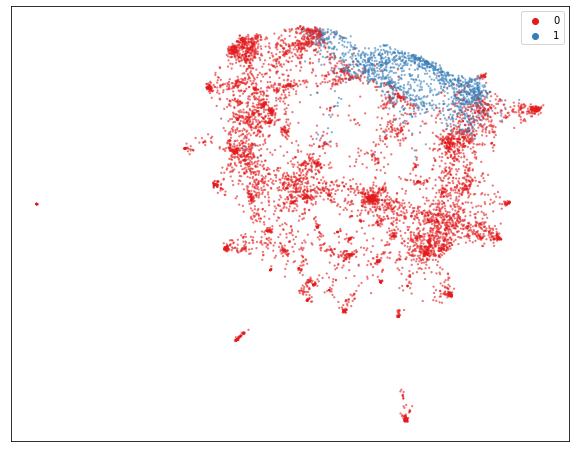

In [14]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = kmeans2.labels_[reordered_indices], 
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')

## Kmeans Clustering (n=3) & UMAP

In [15]:
# K-means Clustering(n =3)
kmeans3 = KMeans(n_clusters=3, random_state=42) 
kmeans3.fit(data_pca)
data_pca_kmeans2 = kmeans3.fit_transform(data_pca)

In [16]:
kmeans3_labels = kmeans3.labels_

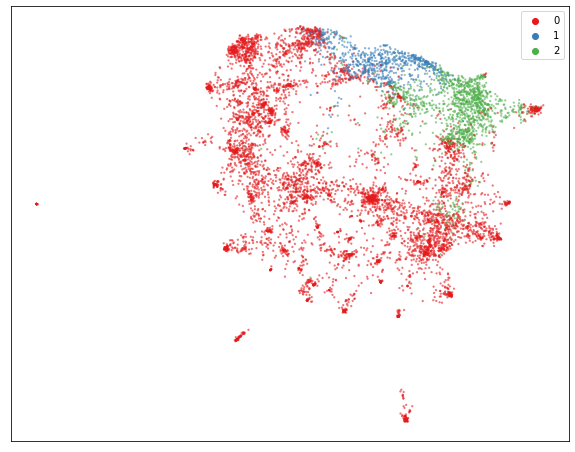

In [17]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = kmeans3.labels_[reordered_indices], 
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')

## Kmeans Clustering (n=4) & UMAP

In [18]:
# K-means Clustering(n =4)
kmeans4 = KMeans(n_clusters=4, random_state=42) 
kmeans4.fit(data_pca)
data_pca_kmeans4 = kmeans4.fit_transform(data_pca)

In [19]:
kmeans4_labels = kmeans4.labels_

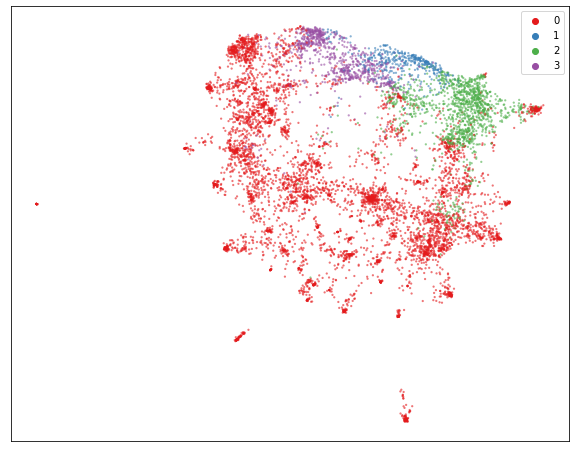

In [20]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = kmeans4.labels_[reordered_indices], 
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')

## Kmeans Clustering (n=5) & UMAP

In [8]:
# K-means Clustering(n =5)
kmeans5 = KMeans(n_clusters=5, random_state=42) 
kmeans5.fit(data_pca)
data_pca_kmeans5 = kmeans5.fit_transform(data_pca)

In [9]:
kmeans5_labels = kmeans5.labels_

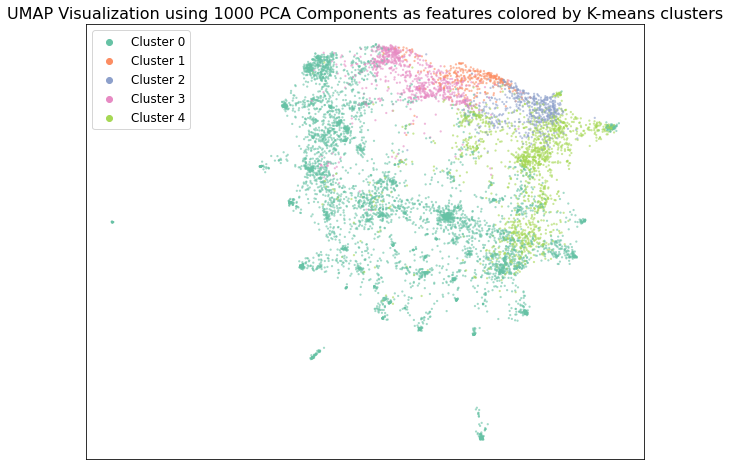

In [23]:
with sns.color_palette("Set2"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = kmeans5.labels_[reordered_indices],
                    s=5, linewidth = .0, alpha = .6, 
                    palette="Set2"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')
    plt.title("UMAP Visualization using 1000 PCA Components as features colored by K-means clusters", fontsize=16)
    
    # 凡例ラベルをカスタマイズ
    handles, labels = ax.get_legend_handles_labels()  # 凡例のハンドルとラベルを取得
    labels = [f"Cluster {label}" for label in labels]  # 'Cluster' + クラスター番号をラベルに追加
    ax.legend(handles=handles, labels=labels, title='', loc='upper left', fontsize=12)

## Kmeans Clustering (n=6) & UMAP

In [24]:
# K-means Clustering(n =6)
kmeans6 = KMeans(n_clusters=6, random_state=42) 
kmeans6.fit(data_pca)
data_pca_kmeans6 = kmeans6.fit_transform(data_pca)

In [25]:
kmeans6_labels = kmeans6.labels_

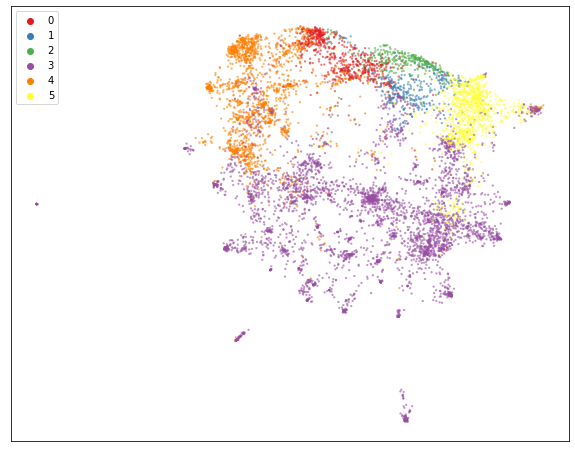

In [26]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    
    np.random.seed(1)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = kmeans6.labels_[reordered_indices], 
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')

In [27]:

# Get the number of clusters
n_clusters2 = len(np.unique(kmeans2_labels))
n_clusters3 = len(np.unique(kmeans3_labels))
n_clusters4 = len(np.unique(kmeans4_labels))
n_clusters5 = len(np.unique(kmeans5_labels))
n_clusters6 = len(np.unique(kmeans6_labels))

# List to store cluster center point
cluster_centers2 = []
cluster_centers3 = []
cluster_centers4 = []
cluster_centers5 = []
cluster_centers6 = []



# Process for each cluster
for i in range(n_clusters2):
    # Get data points for cluster i
    cluster_data = data_pca[kmeans2_labels == i]
    
    # Calculate the center point (average) of the cluster
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers2.append(cluster_center)
    
for i in range(n_clusters3):
    cluster_data = data_pca[kmeans3_labels == i]
    
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers3.append(cluster_center)
    
    
for i in range(n_clusters4):
    cluster_data = data_pca[kmeans4_labels == i]
    
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers4.append(cluster_center)
    
for i in range(n_clusters5):
    cluster_data = data_pca[kmeans5_labels == i]
    
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers5.append(cluster_center)
    
for i in range(n_clusters6):
    cluster_data = data_pca[kmeans6_labels == i]
    
    cluster_center = np.mean(cluster_data, axis=0)
    cluster_centers6.append(cluster_center)

# Calculate WSS
wss2 = 0
wss3 = 0
wss4 = 0
wss5 = 0
wss6 = 0

for i in range(n_clusters2):
    cluster_data = data_pca[kmeans2_labels == i]
    cluster_center = cluster_centers2[i]
    
    wss2 += np.sum((cluster_data - cluster_center) ** 2)

print('WSS:', wss2)

for i in range(n_clusters3):
    cluster_data = data_pca[kmeans3_labels == i]
    cluster_center = cluster_centers3[i]
    
    wss3 += np.sum((cluster_data - cluster_center) ** 2)

print('WSS:', wss3)

for i in range(n_clusters4):
    cluster_data = data_pca[kmeans4_labels == i]
    cluster_center = cluster_centers4[i]
    
    wss4 += np.sum((cluster_data - cluster_center) ** 2)

print('WSS:', wss4)

for i in range(n_clusters5):
    cluster_data = data_pca[kmeans5_labels == i]
    cluster_center = cluster_centers5[i]
    
    wss5 += np.sum((cluster_data - cluster_center) ** 2)

print('WSS:', wss5)

for i in range(n_clusters6):
    cluster_data = data_pca[kmeans6_labels == i]
    cluster_center = cluster_centers6[i]
    
    wss6 += np.sum((cluster_data - cluster_center) ** 2)

print('WSS:', wss6)


WSS: 319552.91425924783
WSS: 312921.84168275737
WSS: 308949.3671456063
WSS: 306584.04895463085
WSS: 305358.65687846346


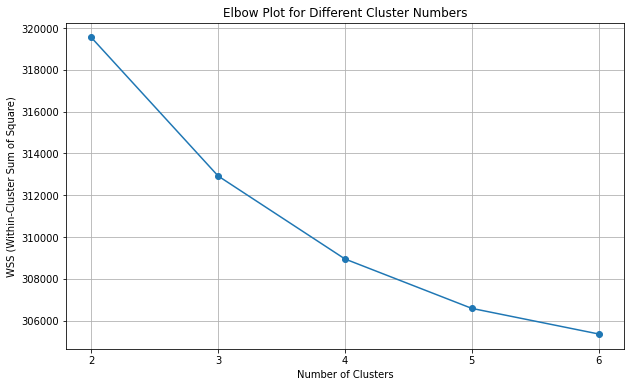

In [28]:
cluster_numbers = [n_clusters2, n_clusters3, n_clusters4, n_clusters5, n_clusters6]
wss_values = [wss2, wss3, wss4, wss5,wss6]

plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, wss_values, marker='o', linestyle='-')
plt.title('Elbow Plot for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS (Within-Cluster Sum of Square)')
plt.xticks(cluster_numbers)
plt.grid(True)
plt.show()


In [29]:
X.columns[X.columns.str.contains('alzheimer', flags=re.IGNORECASE)]

Index([], dtype='object')

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import numpy as np

# Create a sample dataset
x, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)

# Silhouette score calculation for clusters 1 to 5
silhouette_scores = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x)
    labels = kmeans.labels_
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: [0.6149027384959422, 0.7484578543532866, 0.8078167001785502, 0.7993257411585863, 0.7178515157164198, 0.5795168818384456]


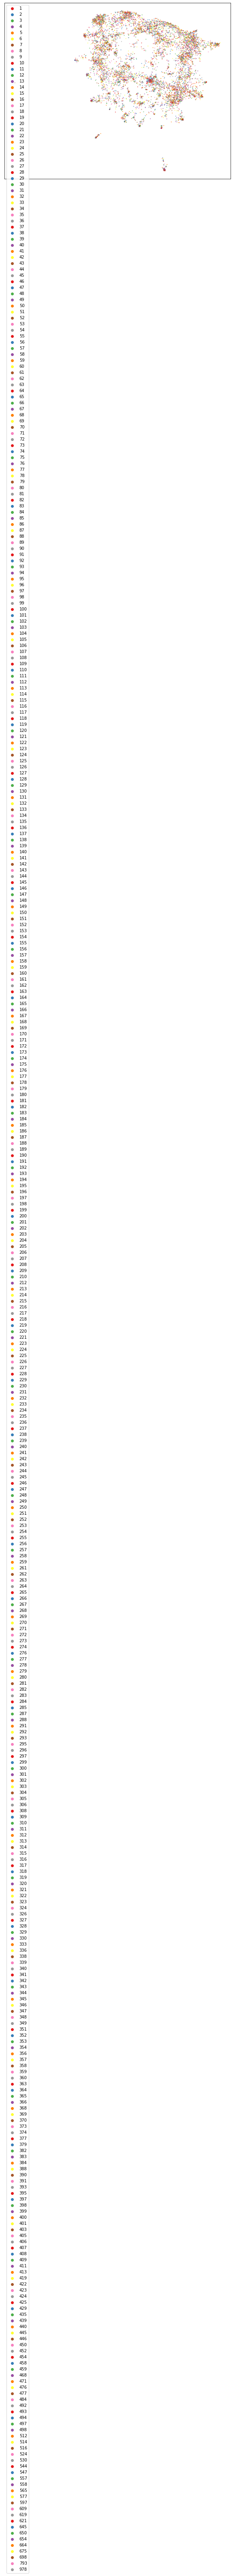

In [30]:
with sns.color_palette("Set1"):
    fig = plt.figure(figsize=(10,8))
    np.random.seed(0)
    reordered_indices = np.arange(X_embedded.shape[0])
    np.random.shuffle(reordered_indices)
    
    sns.scatterplot(x = X_embedded[reordered_indices ,0], y = X_embedded[reordered_indices ,1], 
                    hue = z['#diagnosis'][reordered_indices].values, 
                    s=5, linewidth = .0, alpha = .6,
                    palette="Set1"
                   )
    ax = plt.gca()
    ax.set(xticks=[], yticks=[], facecolor='white')

# Best number of clusters is 5

In [32]:
np.unique(kmeans5_labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [33]:
X['Cluster5'] = kmeans5_labels

In [34]:
# OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encoding the Cluster id
X_encoded = encoder.fit_transform(X[['Cluster5']])

In [35]:
X_encoded.shape[1]

5

In [36]:

# Data Frame of the encoded clusters
X_encoded_df = pd.DataFrame(X_encoded, columns=[f'Cluster_{i}' for i in range(X_encoded.shape[1])])

In [37]:
X_encoded_df

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
8358,0.0,0.0,1.0,0.0,0.0
8359,1.0,0.0,0.0,0.0,0.0
8360,1.0,0.0,0.0,0.0,0.0
8361,0.0,0.0,0.0,1.0,0.0


In [38]:
X_encoded_df.index = z.index

In [39]:
alldiag_pivot_cluster = alldiag_pivot.join(X_encoded_df)

In [40]:
labels = pd.DataFrame(kmeans5_labels, columns=['Cluster'])

In [41]:
labels.index = z.index

In [42]:
alldiag_pivot_cluster = alldiag_pivot_cluster.join(labels)

In [43]:
alldiag_pivot_cluster

,"""walking corpse"" syndrome",'light-for-dates' infant with signs of fetal malnutrition,(HFpEF) heart failure with preserved ejection fraction (HCC),(Idiopathic) normal pressure hydrocephalus (HCC),1st MTP arthritis,1st degree AV block,"2-part displaced fracture of surgical neck of right humerus, initial encounter for closed fracture","2-part displaced fracture of surgical neck of right humerus, subsequent encounter for fracture with routine healing","2-part nondisplaced fracture of surgical neck of left humerus, initial encounter for closed fracture","2-part nondisplaced fracture of surgical neck of left humerus, subsequent encounter for fracture with routine healing",...,Age,Sex,Race,Death_Status,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster
PatientID,,,,,,,,,,,,,,,,,,,,,
D0003B2687D8F9,0,0,0,0,0,0,0,0,0,0,...,88,Female,White or Caucasian,Alive,1.0,0.0,0.0,0.0,0.0,0
D000D5B83D9620,0,0,0,0,0,0,0,0,0,0,...,91,Female,White or Caucasian,Alive,1.0,0.0,0.0,0.0,0.0,0
D000D6884BD199,0,0,0,0,0,0,0,0,0,0,...,90,Male,White or Caucasian,Alive,1.0,0.0,0.0,0.0,0.0,0
D0016F824B7B74,0,0,0,0,0,0,0,0,0,0,...,91,Male,White or Caucasian,Deceased,0.0,0.0,0.0,1.0,0.0,3
D00195531E21B1,0,0,0,0,0,0,0,0,0,0,...,91,Female,Black or African American,Alive,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DFFCD874260A78,0,0,0,0,0,0,0,0,0,0,...,91,Female,Native Hawaiian or Other Pacific Islander,Deceased,0.0,0.0,1.0,0.0,0.0,2
DFFE6A5DC77E11,0,0,0,0,0,0,0,0,0,0,...,74,Male,White or Caucasian,Alive,1.0,0.0,0.0,0.0,0.0,0
DFFF132A593DAB,0,0,0,0,0,0,0,0,0,0,...,90,Female,White or Caucasian,Alive,1.0,0.0,0.0,0.0,0.0,0


In [44]:
import pickle

In [45]:
pwd

'/wynton/protected/home/sirota/ykatsuhara/AD_PCA_Clustering/NoOutlier_AD_DiagnosisName'

In [46]:
# Pickle形式で保存
with open('df_kmeans_rdm42_traditional5_diagnosis.pkl', 'wb') as f:
    pickle.dump(alldiag_pivot_cluster, f)

In [47]:
alldiag_pivot_cluster.to_csv('df_kmeans_rdm42_traditional5_diagnosis.csv', index=False)